## Nama : Muhamad Ibnu Khaidar Hafiz
### -  Kelas : 4IA15
### - NPM : 50421867

## latihan portofolio

menggunakan pendekatan crisp-dm

### Todo
1. Data Understanding
2. Data Preparation
3. Modelling
4. Evaluasi
5. Deployment

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Understanding

### Import data and load data

In [2]:
df = pd.read_csv('rumah123_yogya_unfiltered.csv')
df.head()

,price,nav-link,description,listing-location,bed,bath,carport,surface_area,building_area
0,"Rp 1,79 Miliar",https://www.rumah123.com/properti/sleman/hos17...,Rumah 2 Lantai Baru di jalan Palagan Sleman Y...,"Ngaglik, Sleman",3.0,3.0,2.0,120 m²,110 m²
1,Rp 170 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH BARU DEKAT AL AZHAR DAN UGM,"Jombor, Sleman",3.0,2.0,1.0,102 m²,126 m²
2,Rp 695 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH ASRI DAN SEJUK DI BERBAH SLEMAN DEKAT PA...,"Berbah, Sleman",2.0,2.0,1.0,100 m²,100 m²
3,Rp 560 Juta,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah 5 Menit Dari Candi Prambanan Tersi...,"Prambanan, Sleman",3.0,1.0,1.0,109 m²,67 m²
4,Rp 200 Juta,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah Cicilan 1jt Di Moyudan Sleman,"Moyudan, Sleman",2.0,1.0,1.0,60 m²,30 m²


### Cek Shape

In [3]:
df.shape

(2020, 9)

### Cek Tipe Data

In [4]:
df.dtypes

price                object
nav-link             object
description          object
listing-location     object
bed                 float64
bath                float64
carport             float64
surface_area         object
building_area        object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             2020 non-null   object 
 1   nav-link          2020 non-null   object 
 2   description       2020 non-null   object 
 3   listing-location  2020 non-null   object 
 4   bed               2001 non-null   float64
 5   bath              1999 non-null   float64
 6   carport           1713 non-null   float64
 7   surface_area      2019 non-null   object 
 8   building_area     2019 non-null   object 
dtypes: float64(3), object(6)
memory usage: 142.2+ KB


ternyata kolom `price` itu sebagai objek dan juga `surface_area` yaitu luas tanah dan `building_area` luas bangunan akan diubah menjadi float

### Statistika Dasar

In [6]:
df.describe()

,bed,bath,carport
count,2001.000000,1999.000000,1713.000000
mean,3.969015,2.941971,1.559253
std,3.671654,3.517671,1.283030
min,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000
50%,3.000000,2.000000,1.000000
75%,4.000000,3.000000,2.000000
max,49.000000,49.000000,15.000000


In [7]:
df.describe(include='all')

,price,nav-link,description,listing-location,bed,bath,carport,surface_area,building_area
count,2020,2020,2020,2020,2001.000000,1999.000000,1713.000000,2019,2019
unique,401,2020,1923,69,NaN,NaN,NaN,343,228
top,"Rp 1,5 Miliar",https://www.rumah123.com/properti/sleman/hos17...,Rumah Dijual di Yogyakarta,"Ngaglik, Sleman",NaN,NaN,NaN,100 m²,36 m²
freq,36,1,18,303,NaN,NaN,NaN,62,116
mean,NaN,NaN,NaN,NaN,3.969015,2.941971,1.559253,NaN,NaN
std,NaN,NaN,NaN,NaN,3.671654,3.517671,1.283030,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,2.000000,1.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,3.000000,2.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,4.000000,3.000000,2.000000,NaN,NaN


## Data Preparation

### Cek Missing Value

In [8]:
df.isna().any()

price               False
nav-link            False
description         False
listing-location    False
bed                  True
bath                 True
carport              True
surface_area         True
building_area        True
dtype: bool

terdapat missing value di `bed`, `bath`, `carport`, `surface_area`, dan `building_area`

In [9]:
df.isna().sum()

price                 0
nav-link              0
description           0
listing-location      0
bed                  19
bath                 21
carport             307
surface_area          1
building_area         1
dtype: int64

### Konversi Miliar ke juta

In [10]:
df.head()

,price,nav-link,description,listing-location,bed,bath,carport,surface_area,building_area
0,"Rp 1,79 Miliar",https://www.rumah123.com/properti/sleman/hos17...,Rumah 2 Lantai Baru di jalan Palagan Sleman Y...,"Ngaglik, Sleman",3.0,3.0,2.0,120 m²,110 m²
1,Rp 170 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH BARU DEKAT AL AZHAR DAN UGM,"Jombor, Sleman",3.0,2.0,1.0,102 m²,126 m²
2,Rp 695 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH ASRI DAN SEJUK DI BERBAH SLEMAN DEKAT PA...,"Berbah, Sleman",2.0,2.0,1.0,100 m²,100 m²
3,Rp 560 Juta,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah 5 Menit Dari Candi Prambanan Tersi...,"Prambanan, Sleman",3.0,1.0,1.0,109 m²,67 m²
4,Rp 200 Juta,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah Cicilan 1jt Di Moyudan Sleman,"Moyudan, Sleman",2.0,1.0,1.0,60 m²,30 m²


In [11]:
def convert_to_juta(price):
    price = price.replace("Rp ", "").replace(",", ".")
    if "Miliar" in price:
        price = float(price.replace(" Miliar", "")) * 1000
    elif "Juta" in price:
        price = float(price.replace(" Juta", ""))
    return price

In [12]:
df['harga_juta'] = df['price'].apply(convert_to_juta)
df.head()

,price,nav-link,description,listing-location,bed,bath,carport,surface_area,building_area,harga_juta
0,"Rp 1,79 Miliar",https://www.rumah123.com/properti/sleman/hos17...,Rumah 2 Lantai Baru di jalan Palagan Sleman Y...,"Ngaglik, Sleman",3.0,3.0,2.0,120 m²,110 m²,1790.0
1,Rp 170 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH BARU DEKAT AL AZHAR DAN UGM,"Jombor, Sleman",3.0,2.0,1.0,102 m²,126 m²,170.0
2,Rp 695 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH ASRI DAN SEJUK DI BERBAH SLEMAN DEKAT PA...,"Berbah, Sleman",2.0,2.0,1.0,100 m²,100 m²,695.0
3,Rp 560 Juta,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah 5 Menit Dari Candi Prambanan Tersi...,"Prambanan, Sleman",3.0,1.0,1.0,109 m²,67 m²,560.0
4,Rp 200 Juta,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah Cicilan 1jt Di Moyudan Sleman,"Moyudan, Sleman",2.0,1.0,1.0,60 m²,30 m²,200.0


### Menghapus Simbol
Menghapus simbol meter persegi

In [13]:
def hapus_meter_persegi(area):
    if isinstance(area, str):
        return area.replace(" m²", "").strip()
    return area

In [14]:
df['luas_tanah'] = df['surface_area'].apply(hapus_meter_persegi)
df['luas_bangunan'] = df['building_area'].apply(hapus_meter_persegi)
df.head()

,price,nav-link,description,listing-location,bed,bath,carport,surface_area,building_area,harga_juta,luas_tanah,luas_bangunan
0,"Rp 1,79 Miliar",https://www.rumah123.com/properti/sleman/hos17...,Rumah 2 Lantai Baru di jalan Palagan Sleman Y...,"Ngaglik, Sleman",3.0,3.0,2.0,120 m²,110 m²,1790.0,120,110
1,Rp 170 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH BARU DEKAT AL AZHAR DAN UGM,"Jombor, Sleman",3.0,2.0,1.0,102 m²,126 m²,170.0,102,126
2,Rp 695 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH ASRI DAN SEJUK DI BERBAH SLEMAN DEKAT PA...,"Berbah, Sleman",2.0,2.0,1.0,100 m²,100 m²,695.0,100,100
3,Rp 560 Juta,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah 5 Menit Dari Candi Prambanan Tersi...,"Prambanan, Sleman",3.0,1.0,1.0,109 m²,67 m²,560.0,109,67
4,Rp 200 Juta,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah Cicilan 1jt Di Moyudan Sleman,"Moyudan, Sleman",2.0,1.0,1.0,60 m²,30 m²,200.0,60,30


In [15]:
# cek tipe data per kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             2020 non-null   object 
 1   nav-link          2020 non-null   object 
 2   description       2020 non-null   object 
 3   listing-location  2020 non-null   object 
 4   bed               2001 non-null   float64
 5   bath              1999 non-null   float64
 6   carport           1713 non-null   float64
 7   surface_area      2019 non-null   object 
 8   building_area     2019 non-null   object 
 9   harga_juta        2020 non-null   float64
 10  luas_tanah        2019 non-null   object 
 11  luas_bangunan     2019 non-null   object 
dtypes: float64(4), object(8)
memory usage: 189.5+ KB


### Menghapus kolom
menghapus kolom `price`, `surface_area`, `building_area`

In [16]:
df.drop(columns=['price','surface_area','building_area'],inplace=True)
df.head()

,nav-link,description,listing-location,bed,bath,carport,harga_juta,luas_tanah,luas_bangunan
0,https://www.rumah123.com/properti/sleman/hos17...,Rumah 2 Lantai Baru di jalan Palagan Sleman Y...,"Ngaglik, Sleman",3.0,3.0,2.0,1790.0,120,110
1,https://www.rumah123.com/properti/sleman/hos17...,RUMAH BARU DEKAT AL AZHAR DAN UGM,"Jombor, Sleman",3.0,2.0,1.0,170.0,102,126
2,https://www.rumah123.com/properti/sleman/hos17...,RUMAH ASRI DAN SEJUK DI BERBAH SLEMAN DEKAT PA...,"Berbah, Sleman",2.0,2.0,1.0,695.0,100,100
3,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah 5 Menit Dari Candi Prambanan Tersi...,"Prambanan, Sleman",3.0,1.0,1.0,560.0,109,67
4,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah Cicilan 1jt Di Moyudan Sleman,"Moyudan, Sleman",2.0,1.0,1.0,200.0,60,30


### Mengatur ulang urutan kolom

In [17]:
urutan_baru = ['nav-link','description','listing-location','harga_juta','luas_tanah','luas_bangunan','bed','bath','carport']
df = df[urutan_baru]
df.head()

,nav-link,description,listing-location,harga_juta,luas_tanah,luas_bangunan,bed,bath,carport
0,https://www.rumah123.com/properti/sleman/hos17...,Rumah 2 Lantai Baru di jalan Palagan Sleman Y...,"Ngaglik, Sleman",1790.0,120,110,3.0,3.0,2.0
1,https://www.rumah123.com/properti/sleman/hos17...,RUMAH BARU DEKAT AL AZHAR DAN UGM,"Jombor, Sleman",170.0,102,126,3.0,2.0,1.0
2,https://www.rumah123.com/properti/sleman/hos17...,RUMAH ASRI DAN SEJUK DI BERBAH SLEMAN DEKAT PA...,"Berbah, Sleman",695.0,100,100,2.0,2.0,1.0
3,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah 5 Menit Dari Candi Prambanan Tersi...,"Prambanan, Sleman",560.0,109,67,3.0,1.0,1.0
4,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah Cicilan 1jt Di Moyudan Sleman,"Moyudan, Sleman",200.0,60,30,2.0,1.0,1.0


### Mengganti tipe data kolom

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   nav-link          2020 non-null   object 
 1   description       2020 non-null   object 
 2   listing-location  2020 non-null   object 
 3   harga_juta        2020 non-null   float64
 4   luas_tanah        2019 non-null   object 
 5   luas_bangunan     2019 non-null   object 
 6   bed               2001 non-null   float64
 7   bath              1999 non-null   float64
 8   carport           1713 non-null   float64
dtypes: float64(4), object(5)
memory usage: 142.2+ KB


menggantikan tipe data `luas_tanah` dan `luas_bangunan` menjadi float

In [19]:
df['luas_tanah'] = pd.to_numeric(df['luas_tanah'], errors='coerce')
df['luas_bangunan'] = pd.to_numeric(df['luas_bangunan'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   nav-link          2020 non-null   object 
 1   description       2020 non-null   object 
 2   listing-location  2020 non-null   object 
 3   harga_juta        2020 non-null   float64
 4   luas_tanah        2019 non-null   float64
 5   luas_bangunan     2019 non-null   float64
 6   bed               2001 non-null   float64
 7   bath              1999 non-null   float64
 8   carport           1713 non-null   float64
dtypes: float64(6), object(3)
memory usage: 142.2+ KB


In [20]:
df.head()

,nav-link,description,listing-location,harga_juta,luas_tanah,luas_bangunan,bed,bath,carport
0,https://www.rumah123.com/properti/sleman/hos17...,Rumah 2 Lantai Baru di jalan Palagan Sleman Y...,"Ngaglik, Sleman",1790.0,120.0,110.0,3.0,3.0,2.0
1,https://www.rumah123.com/properti/sleman/hos17...,RUMAH BARU DEKAT AL AZHAR DAN UGM,"Jombor, Sleman",170.0,102.0,126.0,3.0,2.0,1.0
2,https://www.rumah123.com/properti/sleman/hos17...,RUMAH ASRI DAN SEJUK DI BERBAH SLEMAN DEKAT PA...,"Berbah, Sleman",695.0,100.0,100.0,2.0,2.0,1.0
3,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah 5 Menit Dari Candi Prambanan Tersi...,"Prambanan, Sleman",560.0,109.0,67.0,3.0,1.0,1.0
4,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah Cicilan 1jt Di Moyudan Sleman,"Moyudan, Sleman",200.0,60.0,30.0,2.0,1.0,1.0


### Mengisikan missing value
mengsisikan missing value dengan imputasi KNN

In [21]:
df.isna().sum()

nav-link              0
description           0
listing-location      0
harga_juta            0
luas_tanah            1
luas_bangunan         1
bed                  19
bath                 21
carport             307
dtype: int64

In [22]:
from sklearn.impute import KNNImputer

In [23]:
imputasi = KNNImputer(n_neighbors=5)

In [24]:
kolom_imputasi = ['luas_tanah', 'luas_bangunan', 'bed', 'bath', 'carport']
df[kolom_imputasi] = imputasi.fit_transform(df[kolom_imputasi])
df.isna().sum()

nav-link            0
description         0
listing-location    0
harga_juta          0
luas_tanah          0
luas_bangunan       0
bed                 0
bath                0
carport             0
dtype: int64

In [25]:
# pembulatan ke bawah untuk kolom bed, bath, carport
df['bed'] = np.floor(df['bed'])
df['bath'] = np.floor(df['bath'])
df['carport'] = np.floor(df['carport'])

### Mengecek Outlier
mengecek outlier dengan boxplot

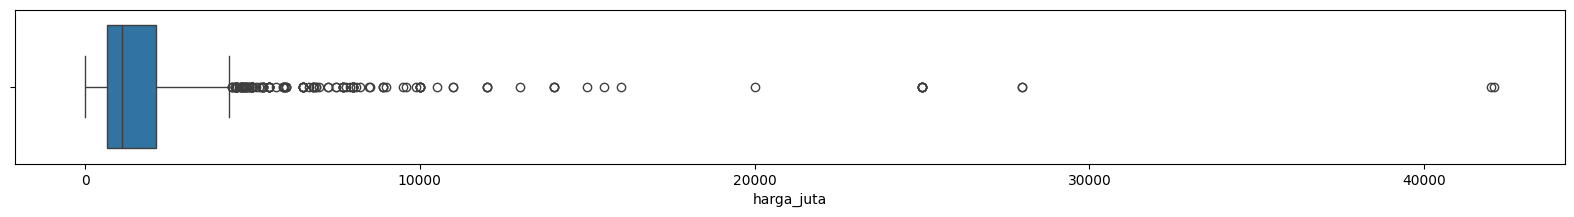

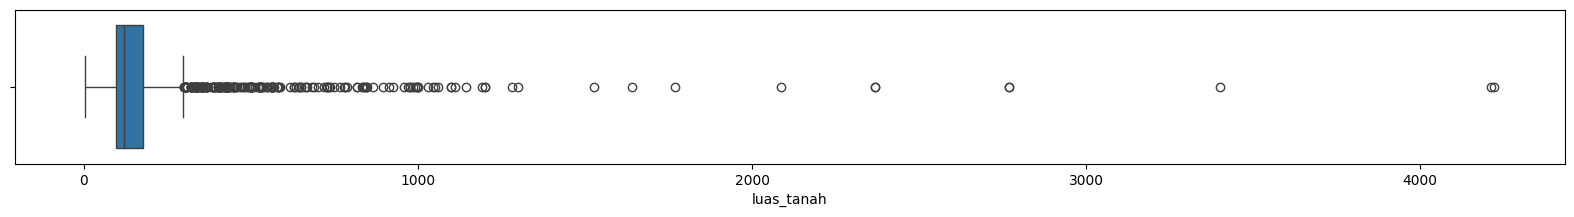

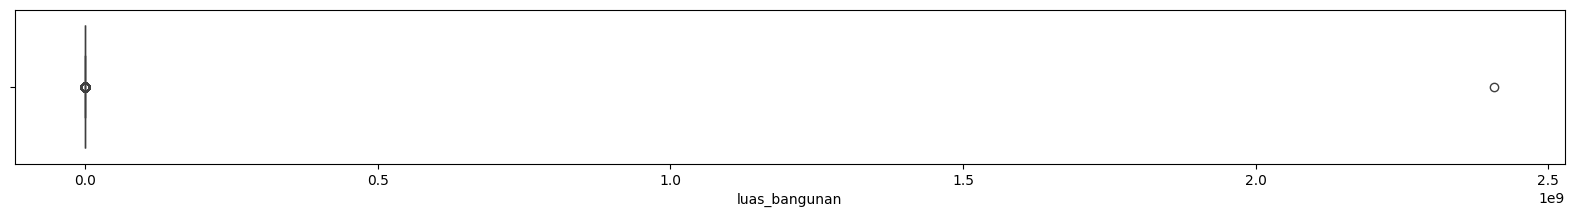

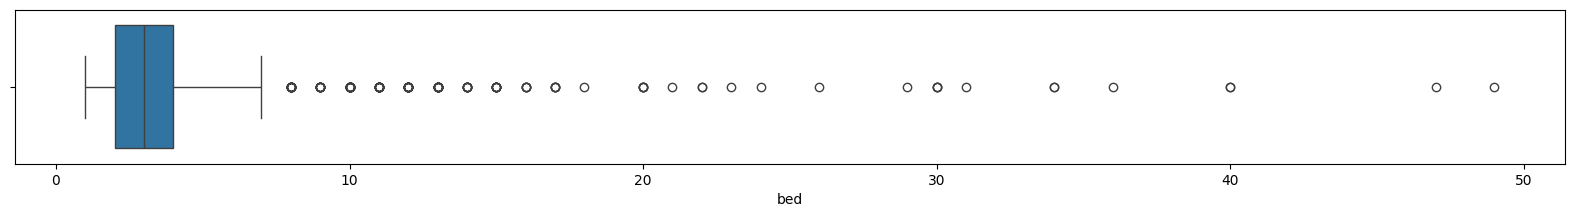

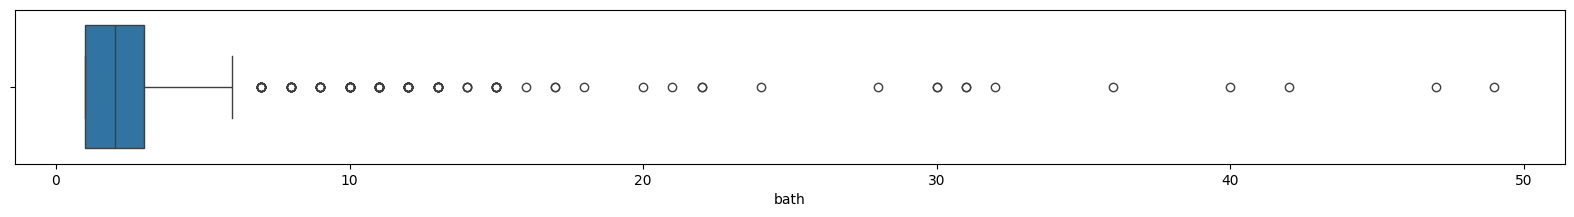

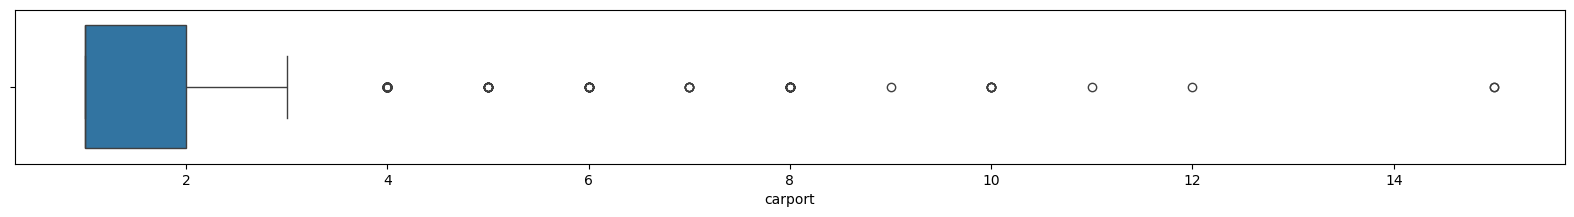

In [26]:
df_outlier = df.select_dtypes(exclude=['object'])
for column in df_outlier:
        plt.figure(figsize=(20,2))
        sns.boxplot(data=df_outlier, x=column)

pada luas bangunan terdapat nilai yang sangan tinggi

In [27]:
# cek nilai luas bangunan yang sangat tinggi
df['luas_bangunan'].max()

2408150000.0

In [28]:
max_index = df['luas_bangunan'].idxmax()
df.loc[max_index], print(f'index ke: {max_index}')

index ke: 1090


(nav-link            https://www.rumah123.com/properti/sleman/hos17...
 description             Dijual Rumah Mewah Bonus 1 Rumah Sleman Jogja
 listing-location                                       Sleman, Sleman
 harga_juta                                                     2400.0
 luas_tanah                                                      182.0
 luas_bangunan                                            2408150000.0
 bed                                                               4.0
 bath                                                              3.0
 carport                                                           1.0
 Name: 1090, dtype: object,
 None)

terdapat luas bangunan yang lebih besar dibandingkan luas tanah, ini tidak masuk akal. saya akan menghapus ini

In [29]:
# menghapus index ke 1090
df.drop(index=1090, inplace=True)

# mengecek luas bangunan yang maksimal sekarang
max_index = df['luas_bangunan'].idxmax()
df.loc[max_index], print(f'index ke: {max_index}')

index ke: 1276


(nav-link            https://www.rumah123.com/properti/sleman/hos17...
 description         Rumah Baru Di Jakal Km 13 Dalam Lingkungan Per...
 listing-location                                      Ngaglik, Sleman
 harga_juta                                                      875.0
 luas_tanah                                                      107.0
 luas_bangunan                                                  5070.0
 bed                                                               3.0
 bath                                                              2.0
 carport                                                           1.0
 Name: 1276, dtype: object,
 None)

berdasarkan pengamatan data sudah masuk akal

cek outlier lagi

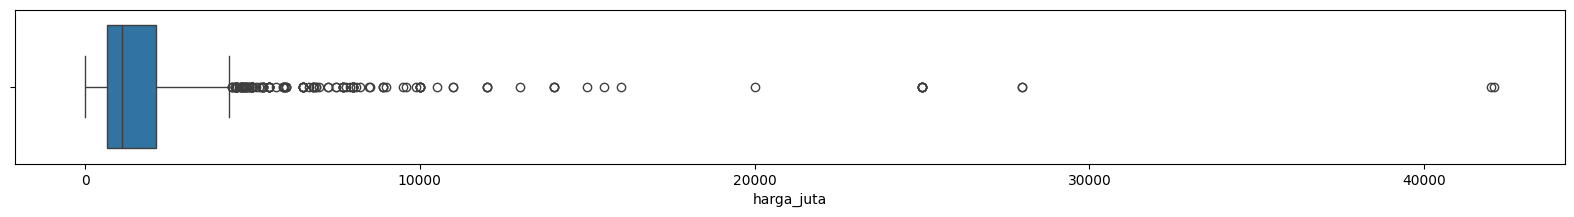

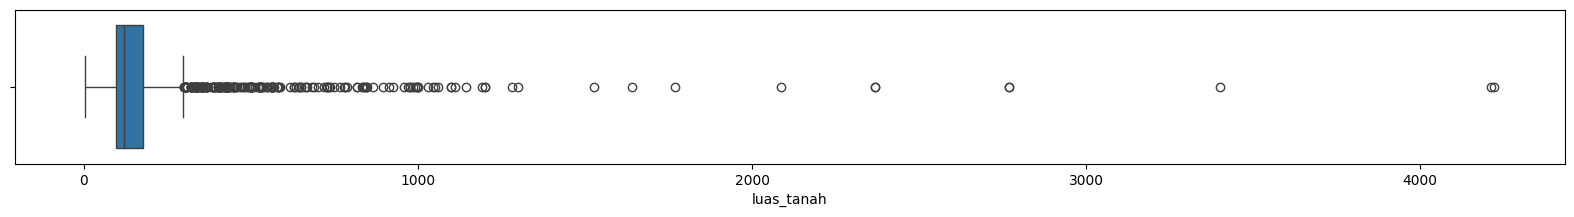

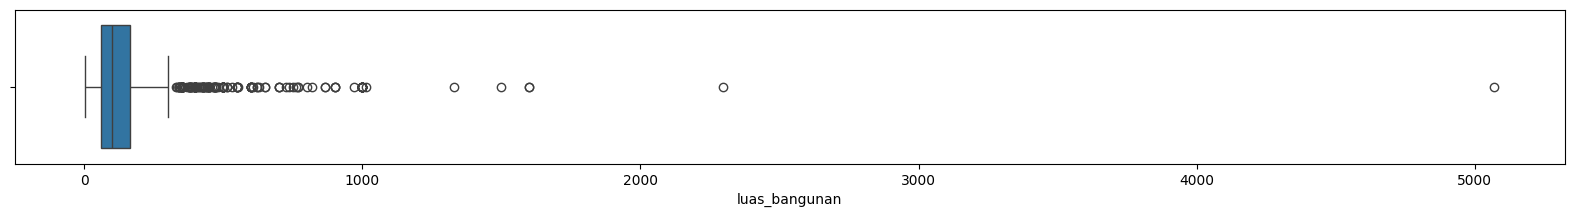

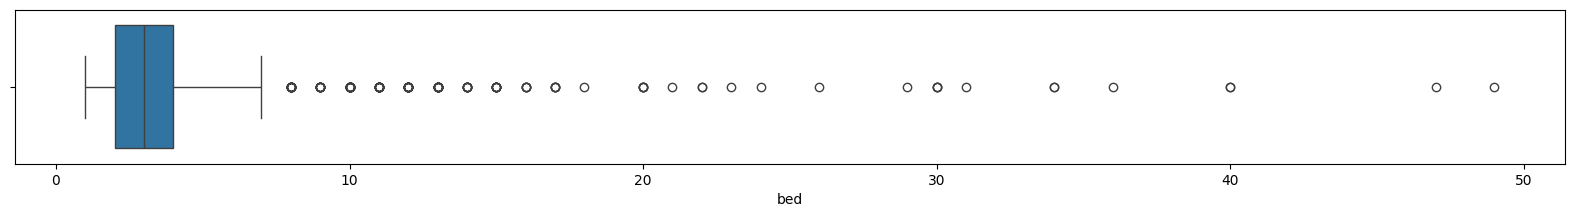

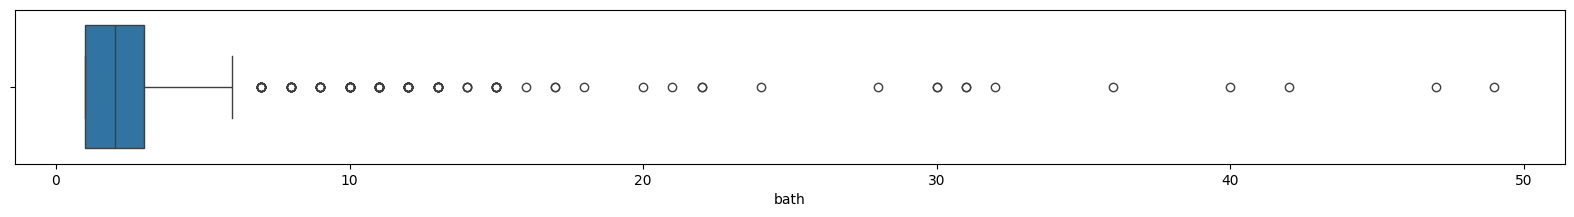

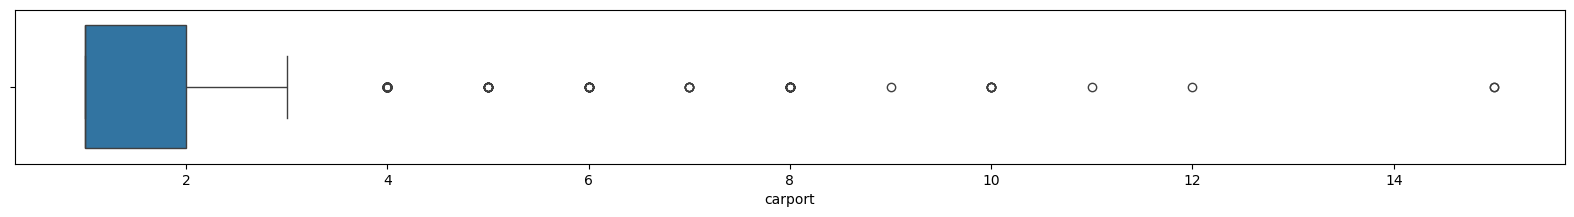

In [30]:
df_outlier = df.select_dtypes(exclude=['object'])
for column in df_outlier:
        plt.figure(figsize=(20,2))
        sns.boxplot(data=df_outlier, x=column)

### Mengatasi Outlier
mengatasi outlier dengan teknik winsorization

In [31]:
from scipy.stats.mstats import winsorize

In [32]:
for column in df_outlier.columns:
    df_outlier[column] = winsorize(df_outlier[column], limits=[0.1, 0.1])

df = df_outlier

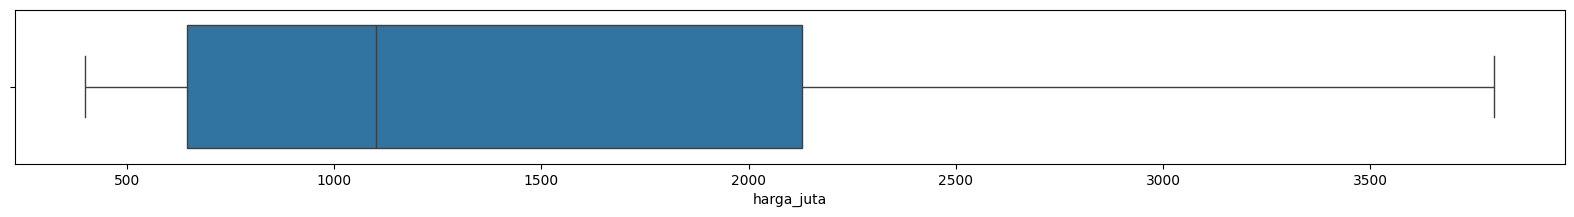

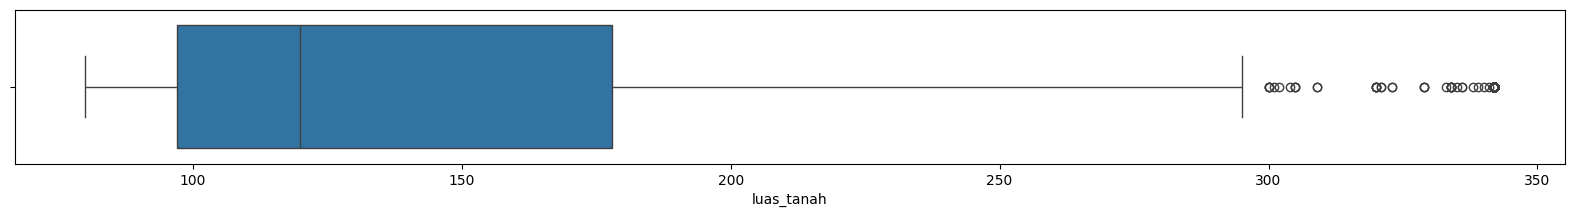

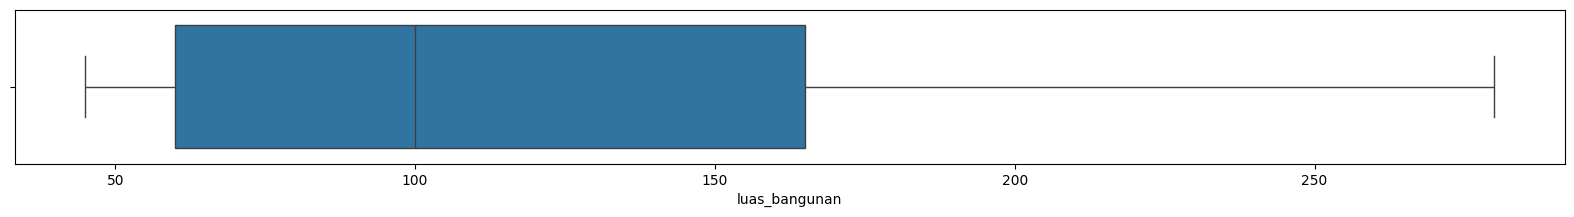

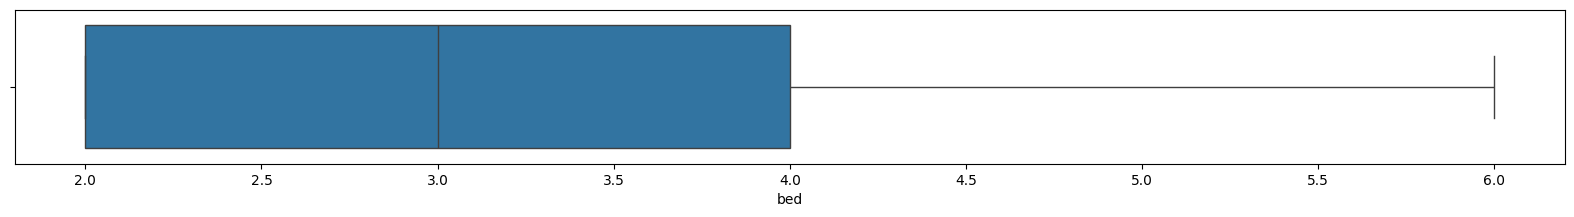

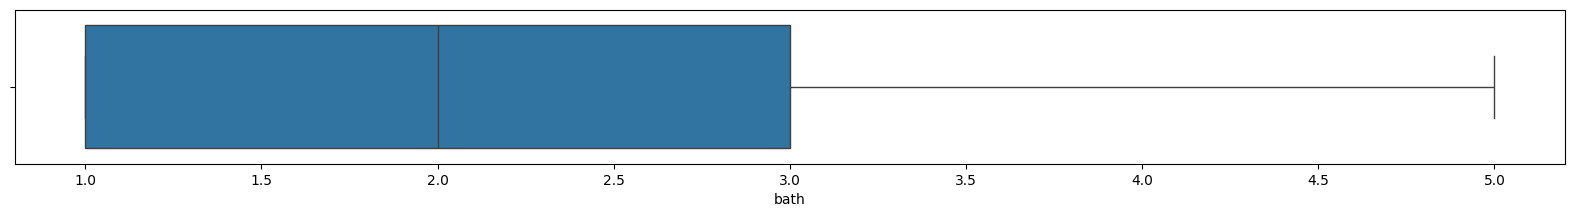

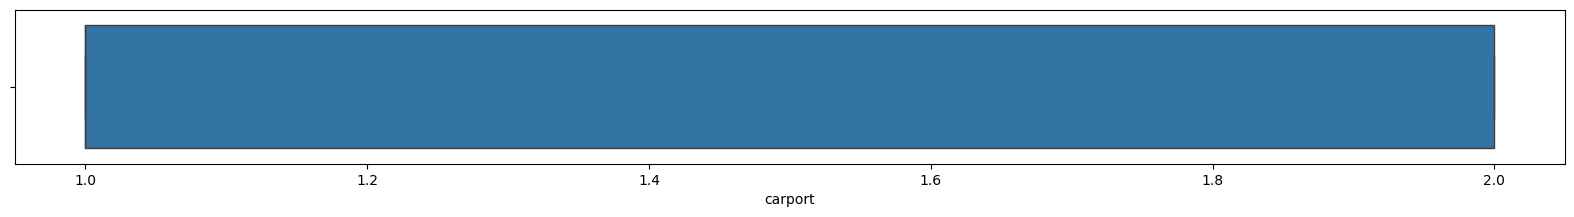

In [33]:
for column in df:
        plt.figure(figsize=(20,2))
        sns.boxplot(data=df, x=column)

masih ada sisa outlier di luas tanah setelah winsorization, dan coba di trim

In [34]:
# membuat kuartil 1 dan 3, dengan mengeluarkan tipe data objek dan menunjuk kuantil 0.25 untuk Q1 dan kuantil 0.75 untuk Q3
q1 = df.select_dtypes(exclude=['object']).quantile (0.25)
q3 = df.select_dtypes(exclude=['object']).quantile (0.75)
iqr = q3-q1
iqr

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


harga_juta       1485.0
luas_tanah         81.0
luas_bangunan     105.0
bed                 2.0
bath                2.0
carport             1.0
dtype: float64

In [35]:
# Filter outlier pada dataset
outlier_filter = (df.select_dtypes(exclude=['object']) < q1 - 1.5 * iqr) | (df.select_dtypes(exclude=['object']) > q3 + 1.5 * iqr)
outlier_filter

,harga_juta,luas_tanah,luas_bangunan,bed,bath,carport
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2015,False,False,False,False,False,False
2016,False,False,False,False,False,False
2017,False,False,False,False,False,False
2018,False,False,False,False,False,False


In [36]:
# Menghitung Jumlah Outlier Pada Data
# hanya kolom length yang punya outlier
for col in outlier_filter.columns :
    if df[col].dtype != object :
        print('Nama Kolom:',col)
        print(outlier_filter[col].value_counts())
        print('-------------------')

Nama Kolom: harga_juta
harga_juta
False    2019
Name: count, dtype: int64
-------------------
Nama Kolom: luas_tanah
luas_tanah
False    1779
True      240
Name: count, dtype: int64
-------------------
Nama Kolom: luas_bangunan
luas_bangunan
False    2019
Name: count, dtype: int64
-------------------
Nama Kolom: bed
bed
False    2019
Name: count, dtype: int64
-------------------
Nama Kolom: bath
bath
False    2019
Name: count, dtype: int64
-------------------
Nama Kolom: carport
carport
False    2019
Name: count, dtype: int64
-------------------


In [37]:
df['luas_tanah'] = winsorize(df['luas_tanah'], limits=[0, 0.12])

<Axes: xlabel='luas_tanah'>

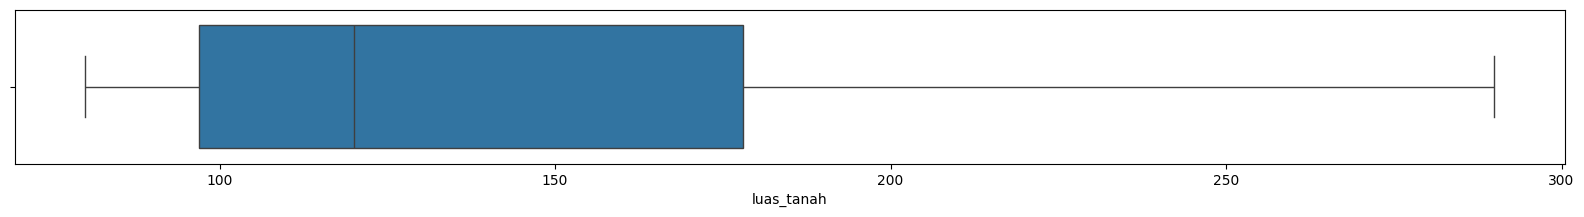

In [38]:
# Mencari Outliers - Boxplot
plt.figure(figsize=(20,2))
sns.boxplot(data=df, x=df['luas_tanah'])

### Cek Heatmap

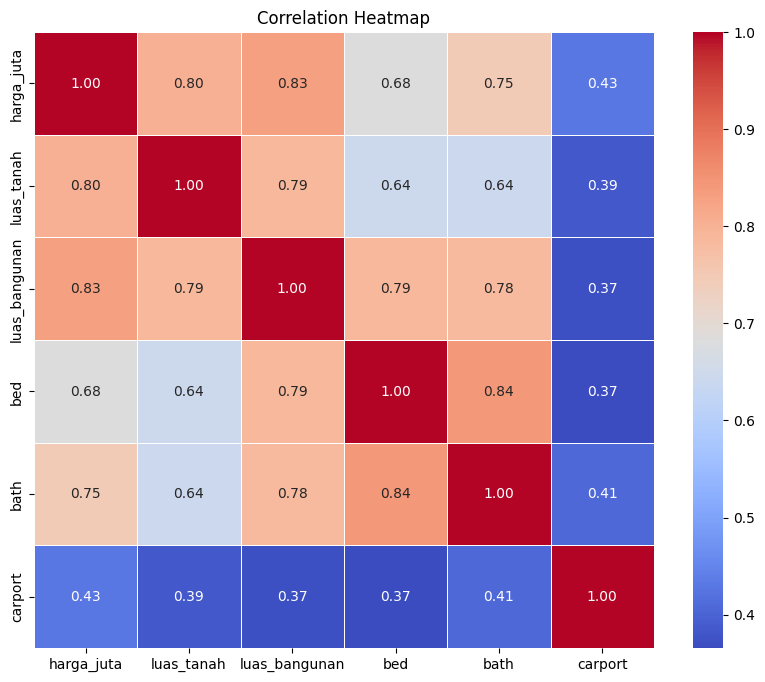

In [39]:
# Menghitung korelasi antar kolom numerik
correlation_matrix = df.corr()

# Membuat correlation heatmap menggunakan seaborn
plt.figure(figsize=(10,8))  # Ukuran plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Modeling

In [40]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [41]:
df.head()

,harga_juta,luas_tanah,luas_bangunan,bed,bath,carport
0,1790.0,120.0,110.0,3.0,3.0,2.0
1,399.0,102.0,126.0,3.0,2.0,1.0
2,695.0,100.0,100.0,2.0,2.0,1.0
3,560.0,109.0,67.0,3.0,1.0,1.0
4,399.0,80.0,45.0,2.0,1.0,1.0


### Modelling Linear Regression 1

In [42]:
X = df[['luas_tanah', 'luas_bangunan', 'bed', 'bath', 'carport']]
y = df['harga_juta']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [44]:
# Memanggil objek LinearRegression ke dalam variabel mlr
lr = LinearRegression()

# Melatih model
lr.fit(X_train, y_train)

LinearRegression()

In [45]:
# Memprediksi model
y_pred_lr = lr.predict(X_test)
# Nilai prediksi
print("Prediction for test set: {}".format(y_pred_lr))

Prediction for test set: [1803.33114884 2784.27769647 1543.62839137  417.5774528  1023.86181478
 1810.61895122 1992.49227506 1044.16422282 1909.59490088 1226.03754666
  928.96683099  600.55728171  655.53289387  357.95726457  457.50759951
 1796.58655843 1084.31925932 3078.17270519 2082.51319035 2367.56578638
 1871.15496814  453.16700802 1028.39972903 3510.42165313  938.74714493
  724.27326957 2078.75660727 2148.33167313  985.84429989  772.11681459
  862.12831203  465.58358476 1080.46543227  477.58511776  417.5774528
 1641.42151262 2920.905396   1071.14431576 1704.29614175 1282.19138458
 2504.29894605 1430.52301024  736.49969235  774.30309253 1466.5000422
 1399.16021589  779.18657888  693.6127116   505.51373147  844.28859948
 1181.53454458  766.83230499 1023.86181478 1771.34809614 1263.38039219
 1720.74147732 1089.95991081 3420.79763242 2809.10692658 1263.66298217
 3705.82543288 3604.88396639  579.59814818  724.27326957  978.15579137
 1131.87561171 1806.46851369  936.37531568 2784.277696

In [46]:
# evaluasi model
mse = mean_squared_error(y_test, y_pred_lr)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 302124.06757338485


In [47]:
# Membandingkan nilai sebenarnya dengan nilai prediksi menggunakan linear regression
lr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_lr})
lr_diff.head()

,Actual value,Predicted value
1557,2100.0,1803.331149
526,3800.0,2784.277696
393,950.0,1543.628391
1790,500.0,417.577453
433,1380.0,1023.861815


In [48]:
# Menerapkan threshold pada variabel y_pred_lr ke dalam variabel y_predict_class
y_predict_class = [1 if prob > 0.6 else 0 for prob in y_pred_lr]

### Menggunakan Tensorflow

In [50]:
# Standardize the feature data
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
import tensorflow as tf

2024-09-29 14:59:49.633482: I tensorflow/core/platform/cpu_feature_guard.cc:211] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [52]:
X_train_scaled.shape

(1615, 5)

In [53]:
y_train_scaled = y_train.values.reshape(-1, 1)
y_test_scaled = y_test.values.reshape(-1, 1)

In [54]:
target_scaler = preprocessing.StandardScaler()
y_train_scaled = target_scaler.fit_transform(y_train_scaled)
y_test_scaled = target_scaler.transform(y_test_scaled)

In [55]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

2024-09-29 14:59:54.031894: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 17050 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB MIG 3g.20gb, pci bus id: 0000:bd:00.0, compute capability: 8.0


In [56]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,497 (9.75 KB)

 Trainable params: 2,497 (9.75 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [58]:
history = model.fit(
    X_train_scaled, y_train_scaled,
    epochs=1000,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/1000


I0000 00:00:1727621998.501837  513721 service.cc:145] XLA service 0x7f30c0007ef0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727621998.501880  513721 service.cc:153]   StreamExecutor device (0): NVIDIA A100-SXM4-40GB MIG 3g.20gb, Compute Capability 8.0
2024-09-29 14:59:58.522591: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-29 14:59:58.590004: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 90300


 1/41 ━━━━━━━━━━━━━━━━━━━━ 1:07 2s/step - loss: 0.8976

I0000 00:00:1727621999.216649  513721 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.8299 - val_loss: 0.2414
Epoch 2/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2510 - val_loss: 0.1947
Epoch 3/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2302 - val_loss: 0.1932
Epoch 4/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2207 - val_loss: 0.1907
Epoch 5/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2087 - val_loss: 0.1847
Epoch 6/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1898 - val_loss: 0.1855
Epoch 7/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1928 - val_loss: 0.1822
Epoch 8/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1897 - val_loss: 0.1917
Epoch 9/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1889 - val_loss: 0.1967
Epoch 10/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2150 - val_loss: 0.1779
Epoch 11/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1820 - val_loss: 0.1802
Epoch 12/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1

In [59]:
# Predict and inverse transform
y_pred_scaled = model.predict(X_test_scaled)
y_pred = target_scaler.inverse_transform(y_pred_scaled)
y_test_original = y_test.values

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


In [60]:
mse = mean_squared_error(y_test_original, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 246569.4826811255


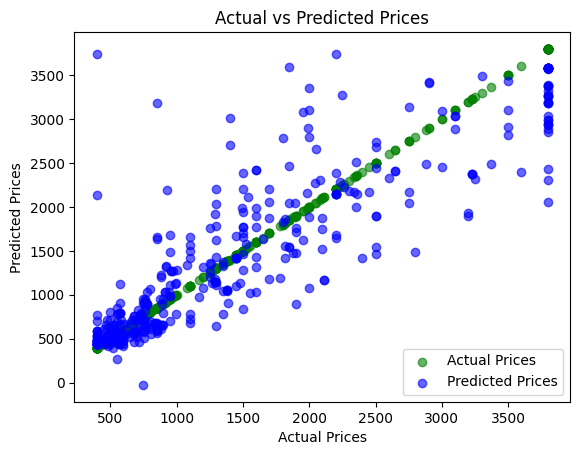

In [63]:
# Plot actual vs predicted prices
# Create the scatter plot for actual prices and predicted prices with different colors
plt.scatter(y_test_original, y_test_original, label="Actual Prices", color='green', alpha=0.6)
plt.scatter(y_test_original, y_pred, label="Predicted Prices", color='blue', alpha=0.6)

# Set the x-label and y-label with different colors
plt.xlabel("Actual Prices")  # Green for x-label
plt.ylabel("Predicted Prices")  # Blue for y-label

# Add title
plt.title("Actual vs Predicted Prices")

# Display the legend
plt.legend()

# Show the plot
plt.show()

### Random Forest

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [66]:
# Fitur (X) dan Target (y)
X1 = df[['luas_tanah', 'luas_bangunan', 'bed', 'bath', 'carport']]
y1 = df['harga_juta']

In [67]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# Inisialisasi model RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Latih model
model.fit(X_train1, y_train1)

RandomForestRegressor(random_state=42)

In [69]:
# Prediksi pada data uji
y_pred1 = model.predict(X_test1)

In [70]:
# Hitung MSE dan R-squared
mse1 = mean_squared_error(y_test1, y_pred1)

print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 246569.4826811255


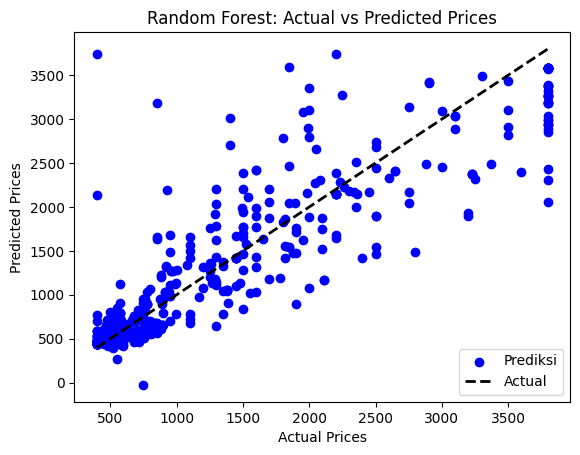

In [71]:
plt.scatter(y_test, y_pred, color='blue', label="Prediksi")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Actual")
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.legend()
plt.show()